# This project utilized Jupyter Notebook, to estimate Sulfur dioxide (SO2) from Carbon dioxide (CO2) 
that are energy emission factors for electricity generation in the United States.

The demand profiles used to generate the data pertain to the following years: eastern interconnect - 2005; Electricity Reliability Council of Texas (ERCOT) - 2008; Western Electricity Coordinating Council (WECC) - 2008.

In [1]:
#import all the require libraries.
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
#imports the CSV dataset using pandas.
dataset = pd.read_csv('usmonthlyaveragehourlyemissionfactorsforaznmegridsubregion.csv')

In [3]:
#checking the number of rows and columns in datasets.
dataset.shape

(301, 14)

In [4]:
#To see the statistical details of the dataset.
dataset.describe()

,Standard Deviation,Min.1,Average.1,Max.1,Standard Deviation.1,Min.2,Average.2,Max.2,Standard Deviation.2
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,50.486711,1.095216,1.412359,1.776611,0.173821,1.722259,2.023289,2.357973,0.158704
std,16.439031,0.229762,0.231923,0.284008,0.073799,0.216598,0.248186,0.305290,0.052351
min,23.100000,0.660000,1.030000,1.160000,0.040000,1.260000,1.600000,1.750000,0.060000
25%,37.600000,0.950000,1.230000,1.590000,0.130000,1.560000,1.830000,2.130000,0.120000
50%,48.600000,1.050000,1.380000,1.770000,0.160000,1.670000,1.980000,2.330000,0.150000
75%,58.800000,1.240000,1.580000,2.010000,0.200000,1.880000,2.200000,2.570000,0.190000
max,106.800000,1.670000,2.000000,2.360000,0.400000,2.310000,2.640000,3.110000,0.370000


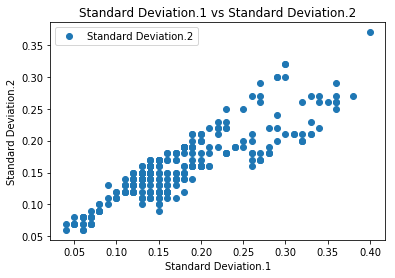

In [5]:
#plot data points on a 2-D graph to eyeball dataset. see if  
#see if can manually find any relationship between the data.
dataset.plot(x='Standard Deviation.1', y='Standard Deviation.2', style='o')  
plt.title('Standard Deviation.1 vs Standard Deviation.2')  
plt.xlabel('Standard Deviation.1')  
plt.ylabel('Standard Deviation.2')  
plt.show()

In [6]:
#attribute set will consist of the “Standard Deviation.1” column which 
#is stored in the X variable, and the label will be the “Standard Deviation.2” 
#column which is stored in y variable.
X = dataset['Standard Deviation.1'].values.reshape(-1,1)
y = dataset['Standard Deviation.2'].values.reshape(-1,1)

In [7]:
#split 80% of the data to the training set while 20% of the data to test set.
#The test_size variable is where we actually specify the proportion of the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
#train algorithm. For that, need to import LinearRegression class, 
#instantiate it, and call the fit() method along with training data.
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
#To make predictions on the test data.
y_pred = regressor.predict(X_test)

In [10]:
#compare the actual output values for X_test with the predicted values.
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.18,0.155857
1,0.27,0.211188
2,0.26,0.266520
3,0.12,0.143561
4,0.12,0.149709
5,0.16,0.211188
6,0.18,0.192744
7,0.06,0.088229
8,0.13,0.125117
9,0.12,0.131265


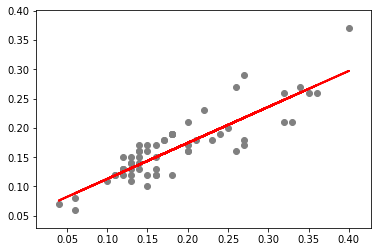

In [11]:
#Though model is not very precise, the predicted percentages are close to the actual ones.
#plot straight line with the test data.
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [12]:
#find the values for these metrics using test data.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.021385211068854534
Mean Squared Error: 0.0007513285536290414
Root Mean Squared Error: 0.02741037310269675
